I recently came accross this blog article ["Cities with Nice Weather"](https://jdonland.github.io/city_temperatures/index.html) by ***Jesse Onland***.

He explains his approach on how to find the best city, in terms of average and variance in temperature.

His analysis is excellent, well written and organized, but the data he used is far from being exhaustive. Indeed, the [list he got from Wikipedia](https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature) only shows temperature data for major cities, so he might be missing some his dream city, just because it's not populated enough...

Also, the list provides temperature data only, no information aboud wind speed and relative humidity, which are two important factors influcencing the perceived temperature.

We can do better 😎

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycountry_convert as pc

plt.rcParams["figure.facecolor"] = (1.0, 1.0, 1.0, 1)
plt.rcParams["figure.figsize"] = [20, 10]

## First step: get data for cities population

In [2]:
dataset_1 = pd.read_csv(r"./data/geonames-all-cities-with-a-population-1000.csv", sep=";", na_filter=False)
dataset_2 = pd.read_csv(r"./data/simplemaps_worldcities_basicv1.75.csv", sep=",", na_filter=False)
# We need to set na_filter=False since pandas will convert country code "NA" for Namibia as NaN...

In [3]:
dataset_1.head()

,Geoname ID,Name,ASCII Name,Alternate Names,Feature Class,Feature Code,Country Code,Country name EN,Country Code 2,Admin1 Code,Admin2 Code,Admin3 Code,Admin4 Code,population,Elevation,DIgital Elevation Model,Timezone,Modification date,LABEL EN,Coordinates
0,8396129,Sanjiang,Sanjiang,"Sanjiang,Sanjiang Jiedao,Sanjiang Qu,san jiang...",P,PPLA3,CN,China,,01,3402,,,0,,14,Asia/Shanghai,2021-09-19,China,"31.34813,118.36132"
1,8405692,Xinmin,Xinmin,"Xinmin,Xinmin Zhen,xin min,xin min zhen,新民,新民镇",P,PPLA4,CN,China,,33,8739734,,,28033,,402,Asia/Shanghai,2022-04-12,China,"30.39759,107.3895"
2,8416824,Jindaoxia,Jindaoxia,"Jindaoxia,Jindaoxia Zhen,jin dao xia,jin dao x...",P,PPLA4,CN,China,,33,8739734,,,13752,,323,Asia/Shanghai,2022-04-01,China,"30.00528,106.65187"
3,8420197,Jianlong,Jianlong,"Jianlong,Jianlong Xiang,jian long,jian long xi...",P,PPLA4,CN,China,,33,8739734,,,18151,,276,Asia/Shanghai,2022-04-01,China,"29.3586,106.18522"
4,8505210,Jianhua,Jianhua,"Bukui,Bukui Jiedao,Jianhua,Jianhua Qu,bo kui,b...",P,PPLA3,CN,China,,08,2302,,,0,,146,Asia/Shanghai,2022-03-12,China,"47.35773,123.95977"


In [4]:
dataset_1.drop(
    columns=[
        "Geoname ID",
        "Feature Class",
        "Feature Code",
        "Admin1 Code",
        "Admin2 Code",
        "Admin3 Code",
        "Admin4 Code",
        "Elevation",
        "DIgital Elevation Model",
        "Modification date",
    ],
    inplace=True,
)

In [5]:
dataset_1["Coordinates"] = dataset_1["Coordinates"].astype("string")
dataset_1[["lat", "lng"]] = dataset_1["Coordinates"].str.split(pat=",", n=1, expand=True)
dataset_1["lat"] = dataset_1["lat"].astype(float)
dataset_1["lng"] = dataset_1["lng"].astype(float)

In [6]:
dataset_2.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000,1076532519


In [7]:
dataset_2.drop(columns=["capital", "id"], inplace=True)

In [8]:
dataset_2 = dataset_2[dataset_2["population"].str.isnumeric()]
dataset_2["population"] = dataset_2["population"].astype(int)

In [9]:
dataset_1.query("population >= 100000", inplace=True)
dataset_2.query("population >= 100000", inplace=True)

In [10]:
print(dataset_1.shape, dataset_2.shape)

(4690, 12) (4943, 9)


Let's see the data for my (small) city in France:

In [11]:
dataset_1.query("`Country Code` == 'FR' and Name == 'Brest'")

,Name,ASCII Name,Alternate Names,Country Code,Country name EN,Country Code 2,population,Timezone,LABEL EN,Coordinates,lat,lng
139736,Brest,Brest,"BES,Brest,Brestia,Bresto,braista,bu lei si te,...",FR,France,,144899,Europe/Paris,France,"48.39029,-4.48628",48.39029,-4.48628


In [12]:
dataset_2.query("`country` == 'France' and city == 'Brest'")

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population
3759,Brest,Brest,48.39,-4.49,France,FR,FRA,Bretagne,139602


Seems accurate!

Let's see for Tokyo:

In [13]:
dataset_1.query("`Country Code` == 'JP' and Name == 'Tokyo'")

,Name,ASCII Name,Alternate Names,Country Code,Country name EN,Country Code 2,population,Timezone,LABEL EN,Coordinates,lat,lng
33145,Tokyo,Tokyo,"Edo,TYO,Tochiu,Tocio,Tokija,Tokijas,Tokio,Toki...",JP,Japan,,8336599,Asia/Tokyo,Japan,"35.6895,139.69171",35.6895,139.69171


In [14]:
dataset_2.query("`country` == 'Japan' and city == 'Tokyo'")

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,39105000


As you can see, there's a huge difference in terms of population size.

Looks like the `dataset_1` considers the 23 wards that made up the boundaries of the historic city of Tokyo, while `dataset_2` considers the greater Tokyo metropolitan area, which is spread over 3 prefectures...

Last check with Manila, capital city of the Philippines:

In [15]:
dataset_1.query("`Country Code` == 'PH' and Name == 'Manila'")

,Name,ASCII Name,Alternate Names,Country Code,Country name EN,Country Code 2,population,Timezone,LABEL EN,Coordinates,lat,lng
16765,Manila,Manila,"City of Manila,Dakbayan sa Manila,Lungsod ng M...",PH,Philippines,,1600000,Asia/Manila,Philippines,"14.6042,120.9822",14.6042,120.9822


In [16]:
dataset_2.query("`country` == 'Philippines' and city == 'Manila'")

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population
3,Manila,Manila,14.6,120.9833,Philippines,PH,PHL,Manila,23971000


Same issue: `dataset_1` considers the Manila city, while `dataset_2` gives data for the larger urban area of Metro Manila.

In [17]:
dataset_1.query("`Country Code` == 'SG' and Name == 'Singapore'")

,Name,ASCII Name,Alternate Names,Country Code,Country name EN,Country Code 2,population,Timezone,LABEL EN,Coordinates,lat,lng
9440,Singapore,Singapore,"SIN,Sin-ka-po,Singapore,Singapore City,Singapo...",SG,Singapore,,3547809,Asia/Singapore,Singapore,"1.28967,103.85007",1.28967,103.85007


In [18]:
dataset_2.query("`country` == 'Singapore'")

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population
135,Singapore,Singapore,1.3,103.8,Singapore,SG,SGP,Central Singapore,5271000


Both dataset seem outdated since Singapore current population is 6M, for both the country and the city.

Some data visualization would help to see if some cities/countries/continents are missing:

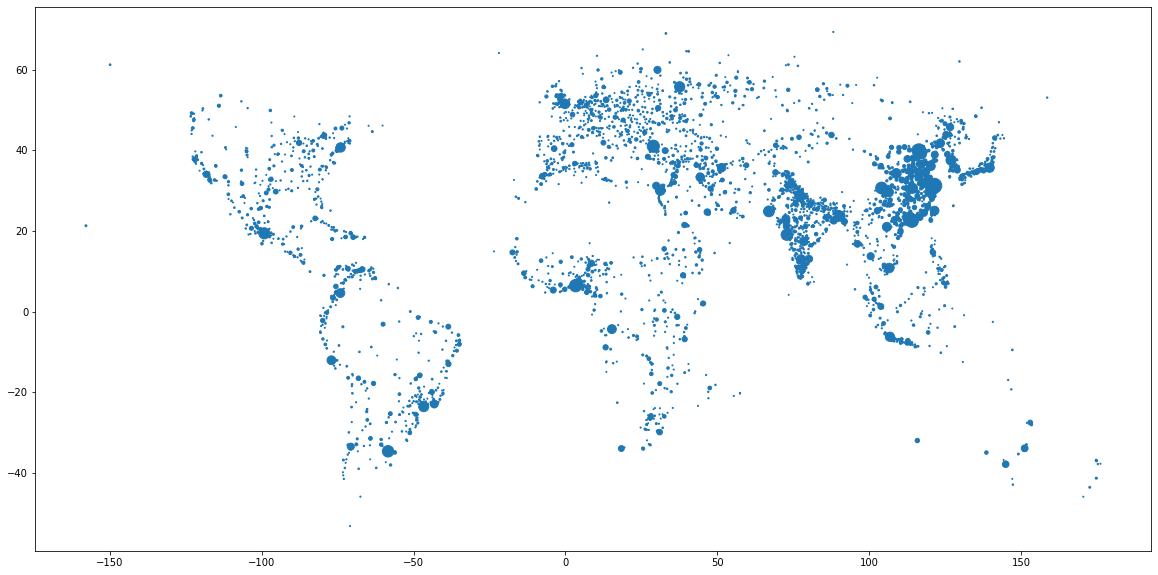

In [19]:
plt.scatter(x=dataset_1["lng"], y=dataset_1["lat"], s=dataset_1["population"] / 1e5)
plt.show()

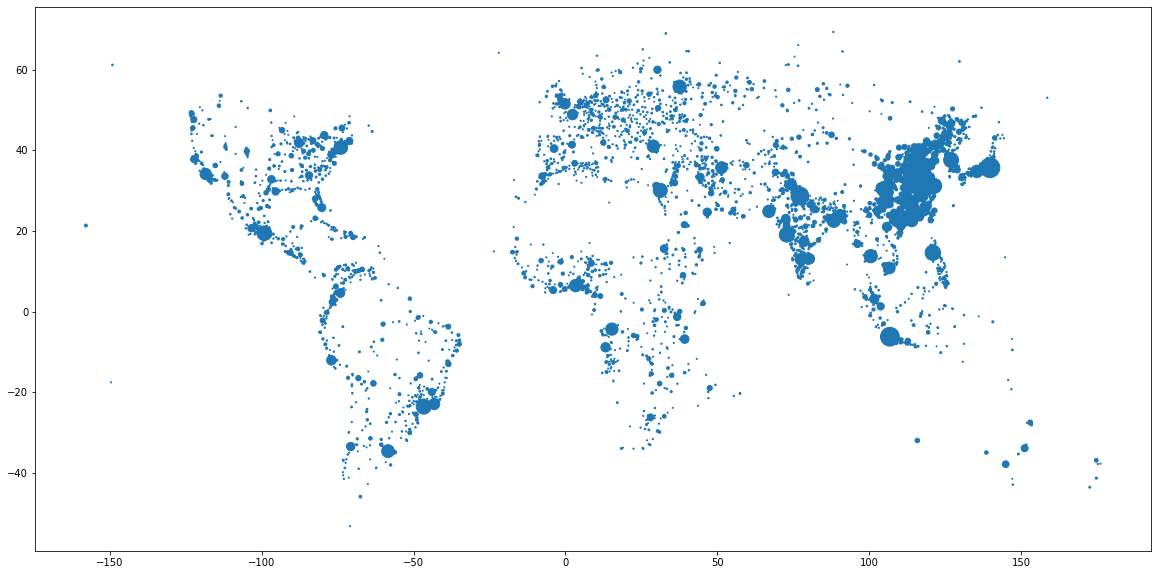

In [20]:
plt.scatter(x=dataset_2["lng"], y=dataset_2["lat"], s=dataset_2["population"] / 1e5)
plt.show()

People sure like living near the sea!

Since both dataset seem accurate enouth, from now on we'll just keep the first dataset.

In [21]:
df = dataset_1
print(df.shape)
df.head()

(4690, 12)


,Name,ASCII Name,Alternate Names,Country Code,Country name EN,Country Code 2,population,Timezone,LABEL EN,Coordinates,lat,lng
75,Manzanillo,Manzanillo,"MZO,Mansanil'o,Mansaniljas,Manzanillo,Manzanil...",CU,Cuba,,128188,America/Havana,Cuba,"20.34173,-77.12126",20.34173,-77.12126
128,Augsburg,Augsburg,"AGY,Agsborg,Aounksmpournk,Augsberg,Augsboerj,A...",DE,Germany,,259196,Europe/Berlin,Germany,"48.37154,10.89851",48.37154,10.89851
177,Tébessa,Tebessa,"TEE,Tebesa,Tebessa,Theveste,Tibissa,Tébessa,ta...",DZ,Algeria,,634332,Africa/Algiers,Algeria,"35.40417,8.12417",35.40417,8.12417
178,Khenchela,Khenchela,"Khenchela,Krenchela,QKJ,khnshlt,خنشلة",DZ,Algeria,,117000,Africa/Algiers,Algeria,"35.43583,7.14333",35.43583,7.14333
180,Guelma,Guelma,"Calama,Galma,Gel'ma,Gelma,Guelma,Kalima,QGE,ga...",DZ,Algeria,,123590,Africa/Algiers,Algeria,"36.46214,7.42608",36.46214,7.42608


## Intermediate (facultative) step: filter cities by interest

I'd like to remove countries/continents that are not for me.

We first add a column for continent code:

In [28]:
df["Country Code"] = df["Country Code"].astype("string")
df.query("`Country Code` != 'TL'", inplace=True)  # Remove Timor-Leste, not supported by pycountry
df.query("`Country Code` != 'EH'", inplace=True)  # Remove Western Sahara, not supported by pycountry
df["Continent Code"] = df.apply(lambda row: pc.country_alpha2_to_continent_code(row["Country Code"]), axis=1)

In [31]:
df["Continent Code"].value_counts()

AS    2155
EU     866
NA     627
AF     552
SA     459
OC      29
Name: Continent Code, dtype: int64

| Continent Code | Continent          |
|:--:|---------------|
| AS | Asia          |
| EU | Europe        |
| NA | North America |
| AF | Africa        |
| SA | South America |
| OC | Oceania       |
| AN | Antartica     |

## Second step: get historial weather data

We now need some historical weather data.

As explained earlier, we can't use [this list](https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature) since it only contains data for "big" cities.